# **Traffic sign classification System**

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [3]:
import cv2

In [4]:
path = "Data"

### Importing  Images

In [12]:
images = []
classNo = []

dataSetPath = "Data"
count = 0
for folder in (os.listdir(dataSetPath)):
    inner = f"{dataSetPath}/{folder}"
    for image in os.listdir(inner):
        imagePath = f"{inner}/{image}"
        img = cv2.imread(imagePath)
        imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(imgGray)
        classNo.append(int(folder))
        
print("Total Classes Detected:",len(set(classNo)))
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43


C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

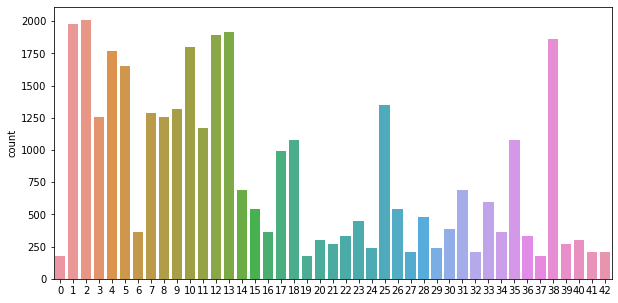

In [13]:
plt.figure(figsize = (10, 5))
sns.countplot(classNo)

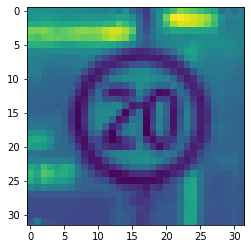

In [15]:
plt.imshow(images[0])

In [17]:
images.shape

(34799, 32, 32)

In [18]:
images = images.reshape(34799, 32, 32, 1)

In [19]:
images[0].shape

(32, 32, 1)

In [20]:
from sklearn.model_selection import train_test_split

X_train_, X_test, y_train_, y_test = train_test_split(images, classNo,
                                                      test_size = 0.2,
                                                      random_state = 30)

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_, y_train_,
                                                      test_size = 0.2,
                                                      random_state = 30)

In [24]:
# Scaling the values
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

In [29]:
from keras.utils.np_utils import to_categorical
y_train_n = to_categorical(y_train,43)
y_validation = to_categorical(y_valid,43)
y_test_n = to_categorical(y_test,43)

In [40]:
y_train_n[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
np.argmax(y_train_n[0])

35

In [38]:
y_train[0]

35

In [34]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

model= keras.models.Sequential()
model.add((Conv2D(60,(5,5),input_shape =(32, 32, 1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
model.add((Conv2D(60, (5,5), activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2))) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS
 
model.add((Conv2D(30, (5,5),activation='relu')))
model.add((Conv2D(30, (5,5), activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
 
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
model.add(Dense(43,activation='softmax')) # OUTPUT LAYER

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 30)          45030     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 30)          22530     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 30)          0

In [42]:
model.compile(optimizer = keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

### AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC

In [43]:
from keras.preprocessing.image import ImageDataGenerator
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES

In [47]:
H = model.fit(dataGen.flow(X_train, y_train_n), epochs = 10,
               batch_size =50,
              validation_data=(X_valid, y_validation))

Epoch 1/10
696/696 [==============================] - 321s 461ms/step - loss: 1.4888 - accuracy: 0.5377 - val_loss: 0.5255 - val_accuracy: 0.8508
Epoch 2/10
696/696 [==============================] - 295s 424ms/step - loss: 0.9755 - accuracy: 0.6961 - val_loss: 0.2698 - val_accuracy: 0.9057
Epoch 3/10
696/696 [==============================] - 267s 384ms/step - loss: 0.7397 - accuracy: 0.7719 - val_loss: 0.1588 - val_accuracy: 0.9594
Epoch 4/10
696/696 [==============================] - 275s 396ms/step - loss: 0.6108 - accuracy: 0.8102 - val_loss: 0.1444 - val_accuracy: 0.9592
Epoch 5/10
696/696 [==============================] - 278s 400ms/step - loss: 0.5370 - accuracy: 0.8326 - val_loss: 0.1109 - val_accuracy: 0.9714
Epoch 6/10
696/696 [==============================] - 277s 397ms/step - loss: 0.4645 - accuracy: 0.8548 - val_loss: 0.0883 - val_accuracy: 0.9723
Epoch 7/10
696/696 [==============================] - 323s 465ms/step - loss: 0.4235 - accuracy: 0.8726 - val_loss: 0.0778 -

In [48]:
json_model = model.to_json()

with open("model.json", "w") as f:
    f.write(json_model)

model.save_weights("model.h5")
print("Model Saved")


Model Saved


In [ ]:
json_model

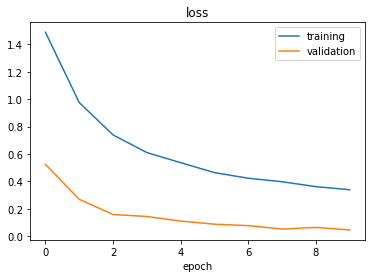

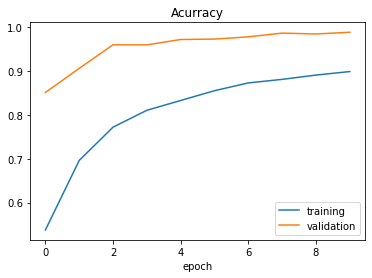

In [49]:
plt.figure(1)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

In [50]:
score =model.evaluate(X_test,y_test_n,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.049884870648384094
Test Accuracy: 0.9870689511299133
